In [7]:
### Copyright (C) 2020  Kairat Bostanbekov (kairat.boss@gmail.com)

import os, shutil, glob, random
import json
import codecs
from collections import OrderedDict

In [8]:
# Paths to images and annotations
IMG_DIR = "HKR_Dataset_Words_Public/img"
ANN_DIR = "HKR_Dataset_Words_Public/ann"
TRAIN_DIR = "HKR_Dataset_Words_Public/train"
VAL_DIR = "HKR_Dataset_Words_Public/val"
TEST1_DIR = "HKR_Dataset_Words_Public/test1"
TEST2_DIR = "HKR_Dataset_Words_Public/test2"

In [126]:
# Create directories
if not os.path.exists(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
if not os.path.exists(VAL_DIR):
    os.makedirs(VAL_DIR)
if not os.path.exists(TEST1_DIR):
    os.makedirs(TEST1_DIR)
if not os.path.exists(TEST2_DIR):
    os.makedirs(TEST2_DIR)

In [127]:
# Counter
def count_symbols(text, symbols):
    for ch in text:
        if ch not in symbols:
            symbols[ch] = 1
        else:
            symbols[ch] += 1
            
def merge_with(d1, d2, fn=lambda x, y: x + y):
    res = d1.copy() # "= dict(d1)" for lists of tuples
    for key, val in d2.items(): # ".. in d2" for lists of tuples
        try:
            res[key] = fn(res[key], val)
        except KeyError:
            res[key] = val
    return res

In [128]:
# Read files from directory to list
all_files = glob.glob(os.path.join(IMG_DIR,"*.jpg"))

In [129]:
# divide trainval and test1_data never seen
test1_per = 7.5 # %
all_classes = []
all_symbols = {}
all_classes_len = 0
form_id = 0
while form_id < 14:
    class_id = 0
    while class_id < 52:
        class_files = []      
        class_symbols = {}
        for i, filename in enumerate(all_files):
            basename = os.path.basename(filename)
            file_class_id = basename.split('_')[1]
            file_form_id = basename.split('_')[0]
            if file_class_id == str(class_id) and file_form_id == str(form_id):
                class_files.append(filename)
                # Annotation
                ann_filename = os.path.splitext(os.path.basename(filename))[0]+'.json'
                ann_file = os.path.join(ANN_DIR, ann_filename)
                with codecs.open(ann_file,'r', encoding="utf-8") as df:
                    annotation_json = json.load(df)
                    annotation_text = annotation_json['description']
                    count_symbols(annotation_text.replace(' ',''), class_symbols)
                    count_symbols(annotation_text.replace(' ',''), all_symbols)             
        if len(class_files) > 0:
            all_len = len(class_files)
            #val_len = int(round(val_per * all_len / 100))
            #test_len = int(round(test_per * all_len / 100))
            #shuffled = class_files[:]
            #random.shuffle(shuffled)
            #val_data = shuffled[:val_len]
            #test_data = shuffled[val_len:val_len+test_len]
            #train_data =shuffled[val_len+test_len:]
            class_symbols = OrderedDict(sorted(class_symbols.items(), key = lambda x : x[1]))
            all_symbols = OrderedDict(sorted(all_symbols.items(), key = lambda x : x[1]))
            all_classes.append([form_id, class_id, all_len, class_symbols])
            all_classes_len += all_len
            print(form_id, class_id, all_len, len(class_symbols), all_classes_len, len(all_symbols))
        class_id += 1
    form_id += 1

0 0 88 10 88 10
0 1 81 6 169 12
0 2 80 8 249 17
0 3 78 12 327 24
0 4 74 13 401 26
0 5 78 7 479 28
0 6 76 12 555 31
0 7 69 7 624 33
0 8 69 14 693 34
0 9 79 10 772 37
0 10 86 11 858 38
0 11 83 12 941 39
0 12 75 7 1016 42
0 13 73 13 1089 43
0 14 73 12 1162 44
0 15 80 13 1242 44
0 16 70 12 1312 44
0 17 75 12 1387 44
0 18 74 10 1461 46
0 19 72 9 1533 46
0 20 75 9 1608 46
0 21 69 5 1677 47
0 22 69 10 1746 47
0 23 74 10 1820 48
0 24 71 14 1891 49
0 25 64 9 1955 50
0 26 85 11 2040 50
0 27 79 10 2119 50
0 28 70 9 2189 50
0 29 64 12 2253 50
0 30 72 11 2325 51
0 31 80 16 2405 51
0 32 81 12 2486 51
0 33 83 12 2569 51
0 34 79 16 2648 51
0 35 80 14 2728 51
0 36 76 10 2804 51
0 37 75 9 2879 51
0 38 79 16 2958 51
0 39 77 9 3035 51
0 40 76 14 3111 51
0 41 75 13 3186 51
0 42 76 6 3262 51
0 43 69 13 3331 51
0 44 71 14 3402 51
0 45 77 12 3479 51
0 46 75 10 3554 52
0 47 71 9 3625 52
0 48 69 10 3694 52
0 49 69 13 3763 52
0 50 69 13 3832 52
0 51 73 11 3905 52
1 0 86 10 3991 52
1 1 82 12 4073 52
1 2 78 4 4151

8 13 67 9 30434 66
8 14 66 14 30500 66
8 15 69 7 30569 66
8 16 74 9 30643 66
8 17 67 16 30710 66
8 18 65 8 30775 66
8 19 70 11 30845 66
8 20 70 16 30915 66
8 21 60 10 30975 66
8 22 58 11 31033 66
8 23 65 10 31098 66
8 24 62 7 31160 66
8 25 52 10 31212 66
8 26 72 16 31284 66
8 27 68 4 31352 66
8 28 65 7 31417 66
8 29 60 12 31477 66
8 30 64 11 31541 66
8 31 67 11 31608 66
8 32 60 14 31668 66
8 33 62 16 31730 66
8 34 63 14 31793 66
8 35 57 15 31850 66
8 36 55 14 31905 66
8 37 60 18 31965 66
8 38 60 9 32025 66
8 39 63 7 32088 66
8 40 77 8 32165 66
8 41 76 8 32241 66
8 42 68 5 32309 66
8 43 69 9 32378 66
8 44 67 10 32445 66
8 45 68 13 32513 66
8 46 68 8 32581 66
8 47 58 9 32639 66
8 48 55 16 32694 66
8 49 61 12 32755 66
8 50 61 10 32816 66
8 51 44 12 32860 66
9 0 73 12 32933 66
9 1 72 9 33005 66
9 2 70 10 33075 66
9 3 66 10 33141 66
9 4 65 9 33206 66
9 5 63 8 33269 66
9 6 65 11 33334 66
9 7 68 9 33402 66
9 8 73 12 33475 66
9 9 67 10 33542 66
9 10 65 7 33607 66
9 11 71 9 33678 66
9 12 62 10 

In [279]:
test1_len = int(round(all_classes_len * 0.075))
print(test1_len)
shuffled = all_classes[:]
random.shuffle(shuffled)
test1_data = []
test1_symbols = {}
test1_symbols_len = 0
i = 0
j = 0
while j < test1_len:
    test1_symbols = merge_with(test1_symbols, shuffled[i][3])
    if len(test1_symbols) > test1_symbols_len:
        test1_data.append(shuffled[i])
        j += shuffled[i][2]
        
        test1_symbols_len = len(test1_symbols)      
    i += 1  
print(j)
print(test1_symbols_len)

4871
4940
73


In [296]:
train_symbols = {}
for sh in shuffled:
    if not sh in test1_data:
        train_symbols = merge_with(train_symbols, sh[3])
        train_symbols = OrderedDict(sorted(train_symbols.items(), key = lambda x : x[1]))
print(train_symbols)
print(len(train_symbols))

OrderedDict([('(', 1), ('Ү', 1), (')', 2), ('Ө', 2), ('ғ', 3), ('–', 12), ('қ', 16), ('ө', 20), ('Қ', 35), (':', 52), ('Э', 60), ('ъ', 61), ('ф', 63), ('Щ', 63), ('Ф', 65), ('Й', 113), ('Ь', 139), ('…', 219), ('—', 219), ('э', 224), ('!', 334), ('ё', 371), (';', 470), ('Ы', 586), ('Х', 613), ('Ч', 781), ('?', 867), ('Ю', 933), ('Ж', 946), ('Е', 1037), ('Ш', 1092), ('Б', 1123), ('Г', 1222), ('Д', 1246), ('щ', 1341), ('Л', 1357), ('М', 1418), ('ц', 1462), ('В', 2023), ('Р', 2028), ('П', 2209), ('Я', 2289), ('З', 2409), ('-', 2638), ('У', 2684), ('ю', 2748), ('И', 3207), ('Н', 3215), ('ш', 3342), ('О', 3382), ('.', 3486), ('Т', 4279), ('С', 4542), ('ж', 5517), ('ч', 6361), ('х', 7098), ('й', 7156), ('б', 7973), ('п', 9732), ('А', 9954), ('г', 9962), (',', 9973), ('ь', 10158), ('К', 10496), ('з', 11628), ('ы', 13083), ('у', 13962), ('д', 15654), ('м', 16007), ('в', 16521), ('я', 17526), ('р', 24050), ('к', 25942), ('л', 26421), ('и', 31943), ('т', 33946), ('с', 34865), ('е', 35490), ('н', 

In [300]:
test1_symbols = {}
for t1 in test1_data:
    test1_symbols = merge_with(test1_symbols, t1[3])
    test1_symbols = OrderedDict(sorted(test1_symbols.items(), key = lambda x : x[1]))
print(test1_symbols)
print(len(test1_symbols))
print((81-len(train_symbols))+(81-len(test1_symbols)))

OrderedDict([('ё', 1), ('-', 1), ('ө', 1), ('Қ', 3), ('Ө', 3), ('—', 14), ('қ', 18), (':', 40), ('.', 41), ('Й', 46), ('–', 47), ('!', 57), (';', 59), ('Э', 60), ('Ш', 63), ('…', 64), ('Ь', 64), ('ф', 65), ('Ч', 66), ('ц', 69), ('э', 69), ('Ю', 74), ('Х', 75), ('Ы', 77), ('З', 79), ('Д', 81), ('ж', 110), ('Р', 128), ('У', 129), ('щ', 132), ('Г', 133), ('ч', 142), ('?', 156), ('х', 194), (',', 201), ('з', 212), ('Л', 228), ('Я', 231), ('г', 262), ('Н', 263), ('Б', 276), ('О', 280), ('В', 287), ('И', 290), ('Е', 297), ('ш', 320), ('Ж', 510), ('й', 531), ('М', 590), ('ь', 643), ('п', 648), ('ю', 670), ('К', 696), ('Т', 714), ('П', 717), ('С', 782), ('ы', 807), ('д', 846), ('б', 935), ('и', 1186), ('м', 1246), ('у', 1326), ('А', 1499), ('я', 1581), ('в', 1605), ('р', 1609), ('н', 1764), ('л', 1993), ('с', 2516), ('к', 2903), ('е', 3037), ('т', 3039), ('о', 3093), ('а', 4438)])
74
7


In [302]:
import numpy as np
sum(np.array(test1_data)[:,2])

5012

In [299]:
#test1_data.append([2, 1, 75, OrderedDict([('Х', 75), ('ь', 75), ('с', 75), ('а', 75), ('м', 75), ('г', 75), ('т', 150), ('о', 225)])])

In [310]:
for t in all_symbols:
    if not t in train_symbols.keys():
        print(t)
        for s in shuffled:
            if t in s[3]:
                #pass
                print(s)
print('-----')
for t in all_symbols:
    if not t in test1_symbols.keys():
        print(t)
        for s in shuffled:
            if t in s[3]:
                #pass
                print(s[:3], s[2]*0.03)
                aux_files = glob.glob(os.path.join(IMG_DIR,str(s[0])+'_'+str(s[1])+"_*.jpg"))
                aux_len = int(round(0.03 * len(aux_files)))
                aux_shuffled = aux_files[:]
                random.shuffle(aux_shuffled)
                aux_test1_data = aux_shuffled[:aux_len]
                print(aux_test1_data)
                for aux_filename in aux_test1_data:
                    shutil.move(aux_filename, os.path.join(TEST1_DIR,"img"))
                    aux_ann_filename = os.path.splitext(os.path.basename(aux_filename))[0]+'.json'
                    aux_ann_file = os.path.join(ANN_DIR, aux_ann_filename)
                    shutil.move(aux_ann_file, os.path.join(TEST1_DIR,"ann"))

-----
(
[10, 20, 422] 12.66
['C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_394.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_151.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_301.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_391.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_284.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_217.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_263.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_440.jpg', 'C:/Users/lenovo/Documents/Projects/kazpost/20200519_Poems-Addr_validated_65K_copy/img\\10_20_130.jpg', 'C:/Users/lenovo/Documents/Projects

In [111]:
# Correction cyrilic symbols
#import re
#all_ann_files = glob.glob(os.path.join(ANN_DIR,"0_9_*.json"))
#for ann_filepath in all_ann_files:
#    print(ann_filepath)
#    with open(ann_filepath, "r", encoding='utf-8') as read_file:
#        ann_data = json.load(read_file)
#    with open(ann_filepath, "w", encoding='utf-8') as write_file:
#        ann_data['description'] = ann_data['description'].replace('o', 'о')
#        json.dump(ann_data, write_file, ensure_ascii=False)

In [308]:
# divide trainval and test1_data never seen
if not os.path.exists(os.path.join(TEST1_DIR,"img")):
    os.makedirs(os.path.join(TEST1_DIR,"img"))
if not os.path.exists(os.path.join(TEST1_DIR,"ann")):
    os.makedirs(os.path.join(TEST1_DIR,"ann"))
for i, filename in enumerate(all_files):
    for form_id, class_id, files_len, sym in test1_data:   
        basename = os.path.basename(filename)
        file_class_id = basename.split('_')[1]
        file_form_id = basename.split('_')[0]
        if file_class_id == str(class_id) and file_form_id == str(form_id):
            shutil.move(filename, os.path.join(TEST1_DIR,"img"))
            ann_filename = os.path.splitext(os.path.basename(filename))[0]+'.json'
            ann_file = os.path.join(ANN_DIR, ann_filename)
            shutil.move(ann_file, os.path.join(TEST1_DIR,"ann"))

In [311]:
all_files = glob.glob(os.path.join(IMG_DIR,"*.jpg"))

In [314]:
# divide trainval and test2_data by every class
if not os.path.exists(os.path.join(TEST2_DIR,"ann")):
    os.makedirs(os.path.join(TEST2_DIR,"ann"))
if not os.path.exists(os.path.join(TEST2_DIR,"img")):
    os.makedirs(os.path.join(TEST2_DIR,"img"))  
    
test2_per = 8.45 # %
form_id = 0
all_symbols = {}
while form_id < 14:
    class_id = 0
    while class_id < 52:
        class_files = []
        class_symbols = {}
        for i, filename in enumerate(all_files):
            basename = os.path.basename(filename)
            file_class_id = basename.split('_')[1]
            file_form_id = basename.split('_')[0]
            if file_class_id == str(class_id) and file_form_id == str(form_id):
                class_files.append(filename)
                # Annotation
                ann_filename = os.path.splitext(os.path.basename(filename))[0]+'.json'
                ann_file = os.path.join(ANN_DIR, ann_filename)
                with codecs.open(ann_file,'r', encoding="utf-8") as df:
                    annotation_json = json.load(df)
                    annotation_text = annotation_json['description']
                    count_symbols(annotation_text.replace(' ',''), class_symbols)
                    count_symbols(annotation_text.replace(' ',''), all_symbols)
        if len(class_files) > 0:
            class_symbols = OrderedDict(sorted(class_symbols.items(), key = lambda x : x[1]))
            all_symbols = OrderedDict(sorted(all_symbols.items(), key = lambda x : x[1]))
            all_len = len(class_files)
            test2_len = int(round(test2_per * all_len / 100))
            shuffled = class_files[:]
            random.shuffle(shuffled)
            test2_data = shuffled[:test2_len]
            print(form_id, class_id, len(test2_data), len(class_symbols), len(all_symbols))
            for test2_file in test2_data:
                shutil.move(test2_file, os.path.join(TEST2_DIR,"img"))
                ann_filename = os.path.splitext(os.path.basename(test2_file))[0]+'.json'
                ann_file = os.path.join(ANN_DIR, ann_filename)
                shutil.move(ann_file, os.path.join(TEST2_DIR,"ann"))
        class_id += 1
    form_id += 1

0 0 7 10 10
0 1 7 6 12
0 2 7 8 17
0 3 7 12 24
0 4 6 13 26
0 5 7 7 28
0 6 6 12 31
0 7 6 7 33
0 8 6 14 34
0 9 7 10 37
0 10 7 11 38
0 11 7 12 39
0 12 6 7 42
0 13 6 13 43
0 14 6 12 44
0 15 7 13 44
0 17 6 12 44
0 18 6 10 46
0 19 6 9 46
0 20 6 9 46
0 21 6 5 47
0 22 6 10 47
0 23 6 10 48
0 24 6 14 49
0 25 5 9 50
0 26 7 11 50
0 28 6 9 50
0 29 5 12 50
0 30 6 11 51
0 31 7 16 51
0 32 7 12 51
0 33 7 12 51
0 34 7 16 51
0 35 7 14 51
0 36 6 10 51
0 37 6 9 51
0 38 7 16 51
0 39 7 9 51
0 40 6 14 51
0 41 6 13 51
0 42 6 6 51
0 43 6 13 51
0 44 6 14 51
0 45 7 12 51
0 47 6 9 51
0 48 6 10 51
0 50 6 13 51
0 51 6 11 51
1 0 7 10 51
1 1 7 12 51
1 2 7 4 52
1 3 7 8 52
1 4 6 9 52
1 5 6 8 53
1 6 7 11 53
1 7 7 5 53
1 8 7 5 53
1 9 6 10 53
1 10 6 7 54
1 11 6 7 54
1 12 6 10 54
1 13 7 5 54
1 14 8 6 54
1 15 7 9 54
1 16 6 7 54
1 17 6 6 54
1 18 6 5 54
1 19 6 5 54
1 20 6 4 54
1 21 7 5 54
1 22 6 8 54
1 23 6 9 54
1 24 5 11 54
1 26 7 7 54
1 27 7 8 54
1 28 6 3 54
1 29 7 8 54
1 30 7 10 54
1 31 6 8 54
1 32 6 11 55
1 33 6 3 55
1 34 6

13 11 6 9 79
13 13 5 7 79
13 14 5 7 80
13 15 5 11 81
13 17 5 11 81
13 18 5 8 81
13 19 5 7 81
13 20 5 8 81
13 21 5 8 81
13 22 5 8 81
13 23 5 11 81
13 24 5 8 81
13 25 5 12 81
13 26 5 7 81
13 28 5 6 81
13 29 5 10 81
13 30 5 7 81
13 31 5 7 81
13 32 5 7 81
13 33 5 7 81
13 34 5 8 81
13 35 5 10 81
13 36 5 10 81
13 37 5 7 81
13 38 5 11 81
13 39 5 7 81
13 41 5 6 81
13 42 5 7 81
13 43 5 11 81
13 44 5 9 81
13 45 5 10 81
13 46 5 10 81
13 47 5 8 81
13 49 5 9 81
13 50 5 8 81
13 51 4 5 81


In [334]:
all_files = glob.glob(os.path.join(IMG_DIR,"*.jpg"))

In [332]:
# Shuffle all dastaset then divide train and val 
val_per = 17.1 # %
all_len = len(all_files)
val_len = int(round(val_per * all_len / 100))
shuffled = all_files[:]
random.shuffle(shuffled)
val_data = shuffled[:val_len]
train_data =shuffled[val_len:]
print(all_len)
print(len(train_data))
print(len(val_data))
print(len(val_data)+len(train_data))

54825
45450
9375
54825


In [318]:
#for test2 in shuffled[:25]:
#    shutil.move(test2, os.path.join(TEST2_DIR,"img"))
#    ann_filename = os.path.splitext(os.path.basename(test2))[0]+'.json'
#    ann_file = os.path.join(ANN_DIR, ann_filename)
#    shutil.move(ann_file, os.path.join(TEST2_DIR,"ann"))

In [337]:
# divide train and val by every class
if not os.path.exists(os.path.join(VAL_DIR,"ann")):
    os.makedirs(os.path.join(VAL_DIR,"ann"))
if not os.path.exists(os.path.join(VAL_DIR,"img")):
    os.makedirs(os.path.join(VAL_DIR,"img"))
    
val_per = 17.1 # %
form_id = 0
all_symbols = {}
while form_id < 14:
    class_id = 0
    while class_id < 52:
        class_files = []
        class_symbols = {}
        for i, filename in enumerate(all_files):
            basename = os.path.basename(filename)
            file_class_id = basename.split('_')[1]
            file_form_id = basename.split('_')[0]
            if file_class_id == str(class_id) and file_form_id == str(form_id):
                class_files.append(filename)
                # Annotation
                ann_filename = os.path.splitext(os.path.basename(filename))[0]+'.json'
                ann_file = os.path.join(ANN_DIR, ann_filename)
                with codecs.open(ann_file,'r', encoding="utf-8") as df:
                    annotation_json = json.load(df)
                    annotation_text = annotation_json['description']
                    count_symbols(annotation_text.replace(' ',''), class_symbols)
                    count_symbols(annotation_text.replace(' ',''), all_symbols)
        if len(class_files) > 0:
            class_symbols = OrderedDict(sorted(class_symbols.items(), key = lambda x : x[1]))
            all_symbols = OrderedDict(sorted(all_symbols.items(), key = lambda x : x[1]))
            all_len = len(class_files)
            val_len = int(round(val_per * all_len / 100))
            shuffled = class_files[:]
            random.shuffle(shuffled)
            val_data = shuffled[:val_len]
            print(form_id, class_id, len(test2_data), len(class_symbols), len(all_symbols))
            for val_file in val_data:
                shutil.move(val_file, os.path.join(VAL_DIR,"img"))
                ann_filename = os.path.splitext(os.path.basename(val_file))[0]+'.json'
                ann_file = os.path.join(ANN_DIR, ann_filename)
                shutil.move(ann_file, os.path.join(VAL_DIR,"ann"))
        class_id += 1
    form_id += 1

0 0 4 10 10
0 1 4 6 12
0 2 4 8 17
0 3 4 12 24
0 4 4 13 26
0 5 4 7 28
0 6 4 12 31
0 7 4 7 33
0 8 4 14 34
0 9 4 10 37
0 10 4 11 38
0 11 4 12 39
0 12 4 7 42
0 13 4 13 43
0 14 4 12 44
0 15 4 13 44
0 17 4 12 44
0 18 4 10 46
0 19 4 9 46
0 20 4 9 46
0 21 4 5 47
0 22 4 10 47
0 23 4 10 48
0 24 4 14 49
0 25 4 9 50
0 26 4 11 50
0 28 4 9 50
0 29 4 11 50
0 30 4 11 51
0 31 4 16 51
0 32 4 12 51
0 33 4 12 51
0 34 4 16 51
0 35 4 14 51
0 36 4 10 51
0 37 4 9 51
0 38 4 15 51
0 39 4 9 51
0 40 4 14 51
0 41 4 13 51
0 42 4 6 51
0 43 4 13 51
0 44 4 14 51
0 45 4 12 51
0 47 4 9 51
0 48 4 10 51
0 50 4 13 51
0 51 4 11 51
1 0 4 10 51
1 1 4 12 51
1 2 4 4 52
1 3 4 8 52
1 4 4 9 52
1 5 4 8 53
1 6 4 11 53
1 7 4 5 53
1 8 4 5 53
1 9 4 10 53
1 10 4 7 54
1 11 4 7 54
1 12 4 10 54
1 13 4 5 54
1 14 4 5 54
1 15 4 9 54
1 16 4 7 54
1 17 4 6 54
1 18 4 5 54
1 19 4 5 54
1 20 4 4 54
1 21 4 5 54
1 22 4 8 54
1 23 4 9 54
1 24 4 11 54
1 26 4 7 54
1 27 4 8 54
1 28 4 3 54
1 29 4 8 54
1 30 4 10 54
1 31 4 8 54
1 32 4 11 55
1 33 4 3 55
1 34 4

13 15 4 11 81
13 17 4 11 81
13 18 4 8 81
13 19 4 7 81
13 20 4 8 81
13 21 4 8 81
13 22 4 8 81
13 23 4 11 81
13 24 4 8 81
13 25 4 12 81
13 26 4 7 81
13 28 4 6 81
13 29 4 10 81
13 30 4 7 81
13 31 4 7 81
13 32 4 7 81
13 33 4 7 81
13 34 4 8 81
13 35 4 10 81
13 36 4 10 81
13 37 4 7 81
13 38 4 11 81
13 39 4 7 81
13 41 4 6 81
13 42 4 7 81
13 43 4 11 81
13 44 4 9 81
13 45 4 10 81
13 46 4 10 81
13 47 4 8 81
13 49 4 8 81
13 50 4 8 81
13 51 4 5 81


In [338]:
if not os.path.exists(os.path.join(TRAIN_DIR,"ann")):
    os.makedirs(os.path.join(TRAIN_DIR,"ann"))
if not os.path.exists(os.path.join(TRAIN_DIR,"img")):
    os.makedirs(os.path.join(TRAIN_DIR,"img"))
for filename in glob.glob(os.path.join(IMG_DIR,"*.jpg")):
    shutil.move(filename, os.path.join(TRAIN_DIR,"img"))
    ann_filename = os.path.splitext(os.path.basename(filename))[0]+'.json'
    ann_file = os.path.join(ANN_DIR, ann_filename)
    shutil.move(ann_file, os.path.join(TRAIN_DIR,"ann"))

In [381]:
# Count symbols
val_symbols = {}
train_symbols = {}
test1_symbols = {}
test2_symbols = {}
for val_file in glob.glob(os.path.join(VAL_DIR,"ann/*.json")):
    with codecs.open(val_file,'r', encoding="utf-8") as df:
        annotation_json = json.load(df)
        annotation_text = annotation_json['description']
        count_symbols(annotation_text.replace(' ',''), val_symbols)
for train_file in glob.glob(os.path.join(TRAIN_DIR,"ann/*.json")):
    with codecs.open(train_file,'r', encoding="utf-8") as df:
        annotation_json = json.load(df)
        annotation_text = annotation_json['description']
        count_symbols(annotation_text.replace(' ',''), train_symbols)
for test1_file in glob.glob(os.path.join(TEST1_DIR,"ann/*.json")):
    with codecs.open(test1_file,'r', encoding="utf-8") as df:
        annotation_json = json.load(df)
        annotation_text = annotation_json['description']
        count_symbols(annotation_text.replace(' ',''), test1_symbols)
for test2_file in glob.glob(os.path.join(TEST2_DIR,"ann/*.json")):
    with codecs.open(test2_file,'r', encoding="utf-8") as df:
        annotation_json = json.load(df)
        annotation_text = annotation_json['description']
        count_symbols(annotation_text.replace(' ',''), test2_symbols)
val_symbols = OrderedDict(sorted(val_symbols.items(), key = lambda x : x[1]))
train_symbols = OrderedDict(sorted(train_symbols.items(), key = lambda x : x[1]))
test1_symbols = OrderedDict(sorted(test1_symbols.items(), key = lambda x : x[1]))
test2_symbols = OrderedDict(sorted(test2_symbols.items(), key = lambda x : x[1]))                                                   
print(len(val_symbols), val_symbols)
print(len(train_symbols), train_symbols)
print(len(test1_symbols), test1_symbols)
print(len(test2_symbols), test2_symbols)

78 OrderedDict([('қ', 1), ('ғ', 1), ('Ө', 1), ('–', 1), ('ө', 2), (':', 4), ('Қ', 7), ('ъ', 8), ('Э', 9), ('Щ', 10), ('Ф', 10), ('ф', 10), ('Й', 16), ('Ь', 21), ('—', 33), ('э', 35), ('…', 35), ('!', 54), ('ё', 61), (';', 78), ('Х', 89), ('Ы', 89), ('Ч', 116), ('?', 135), ('Ж', 143), ('Е', 146), ('Ю', 146), ('Ш', 166), ('Б', 178), ('Г', 188), ('Д', 191), ('щ', 209), ('Л', 213), ('М', 213), ('ц', 227), ('В', 307), ('Р', 315), ('П', 346), ('Я', 363), ('З', 379), ('-', 416), ('ю', 431), ('У', 431), ('Н', 485), ('О', 500), ('И', 508), ('ш', 522), ('.', 556), ('Т', 651), ('С', 705), ('ж', 865), ('ч', 999), ('х', 1103), ('й', 1128), ('б', 1251), ('п', 1515), ('А', 1539), ('г', 1548), ('ь', 1570), (',', 1570), ('К', 1626), ('з', 1811), ('ы', 2041), ('у', 2165), ('д', 2446), ('м', 2488), ('в', 2593), ('я', 2732), ('р', 3765), ('к', 4079), ('л', 4122), ('и', 4967), ('т', 5283), ('с', 5442), ('е', 5547), ('н', 5874), ('о', 7685), ('а', 9879)])
78 OrderedDict([('ғ', 1), ('Ө', 2), ('–', 9), ('қ', 

In [385]:
for t in test1_symbols:
    if not t in train_symbols.keys():
        print(t)
        for train_file in glob.glob(os.path.join(TRAIN_DIR,"ann/*.json")):
            with codecs.open(train_file,'r', encoding="utf-8") as df:
                annotation_json = json.load(df)
                annotation_text = annotation_json['description']
                if t in annotation_text:
                    print(train_file)

In [424]:
train_symbols = OrderedDict(sorted(train_symbols.items()))
val_symbols = OrderedDict(sorted(val_symbols.items()))
test1_symbols = OrderedDict(sorted(test1_symbols.items()))
test2_symbols = OrderedDict(sorted(test2_symbols.items()))
print(OrderedDict(sorted(train_symbols.items())),'\n')
print(OrderedDict(sorted(val_symbols.items())),'\n')
print(OrderedDict(sorted(test1_symbols.items())),'\n')
print(OrderedDict(sorted(test2_symbols.items())),'\n')

OrderedDict([('!', 252), (',', 7555), ('-', 1999), ('.', 2631), (':', 45), (';', 354), ('?', 656), ('А', 7593), ('Б', 856), ('В', 1545), ('Г', 928), ('Д', 950), ('Е', 813), ('Ж', 726), ('З', 1835), ('И', 2431), ('Й', 92), ('К', 7990), ('Л', 1028), ('М', 1080), ('Н', 2468), ('О', 2602), ('П', 1675), ('Р', 1549), ('С', 3470), ('Т', 3271), ('У', 2029), ('Ф', 48), ('Х', 407), ('Ч', 595), ('Ш', 810), ('Щ', 46), ('Ы', 451), ('Ь', 106), ('Э', 46), ('Ю', 709), ('Я', 1753), ('а', 47917), ('б', 6044), ('в', 12519), ('г', 7498), ('д', 11869), ('е', 26911), ('ж', 4178), ('з', 8826), ('и', 24246), ('й', 5417), ('к', 19634), ('л', 20067), ('м', 12083), ('н', 28473), ('о', 37146), ('п', 7394), ('р', 18230), ('с', 26382), ('т', 25621), ('у', 10612), ('ф', 48), ('х', 5388), ('ц', 1112), ('ч', 4828), ('ш', 2540), ('щ', 1017), ('ъ', 46), ('ы', 9907), ('ь', 7659), ('э', 170), ('ю', 2080), ('я', 13300), ('ё', 278), ('ғ', 1), ('Қ', 26), ('қ', 14), ('Ө', 2), ('ө', 16), ('–', 9), ('—', 165), ('…', 165)]) 

Or

In [419]:
val_symbols = OrderedDict(sorted(val_symbols.items(), key = lambda x : x[1]))
train_symbols = OrderedDict(sorted(train_symbols.items(), key = lambda x : x[1]))
test1_symbols = OrderedDict(sorted(test1_symbols.items(), key = lambda x : x[1]))
test2_symbols = OrderedDict(sorted(test2_symbols.items(), key = lambda x : x[1])) 

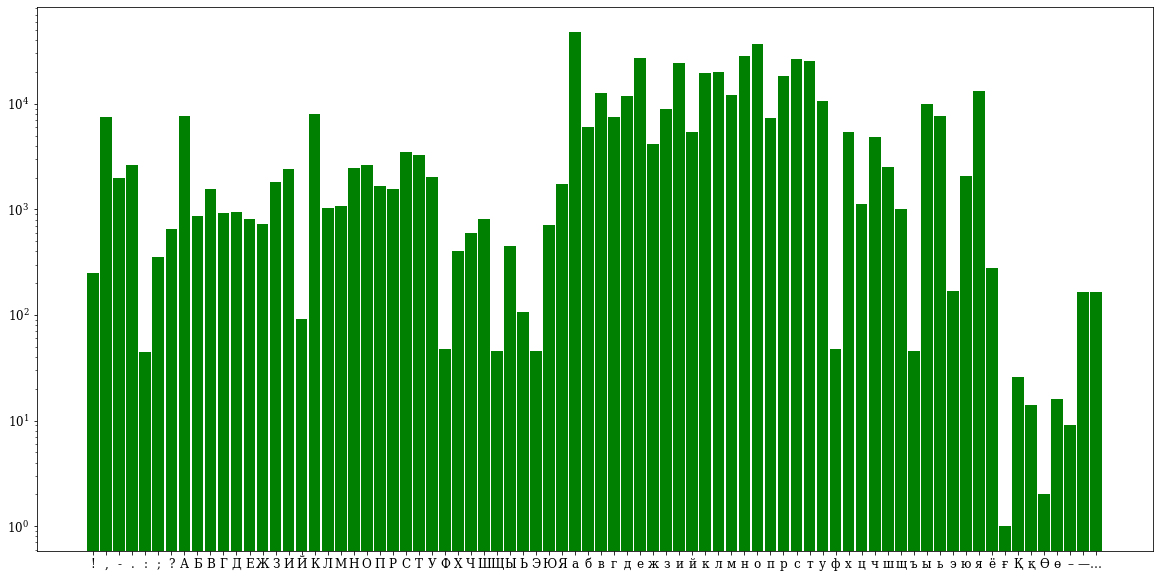

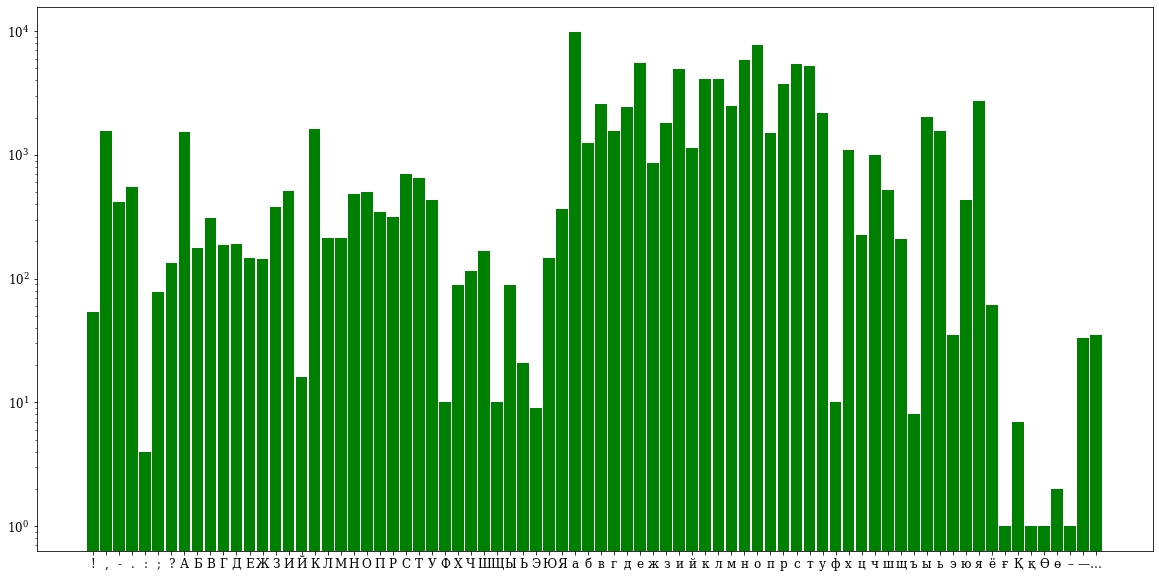

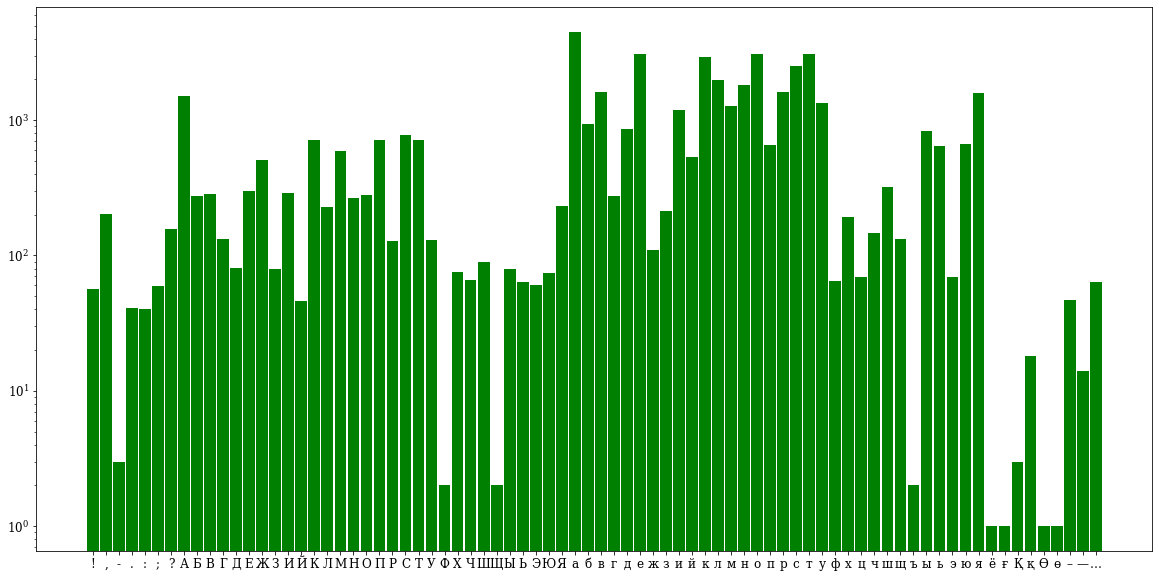

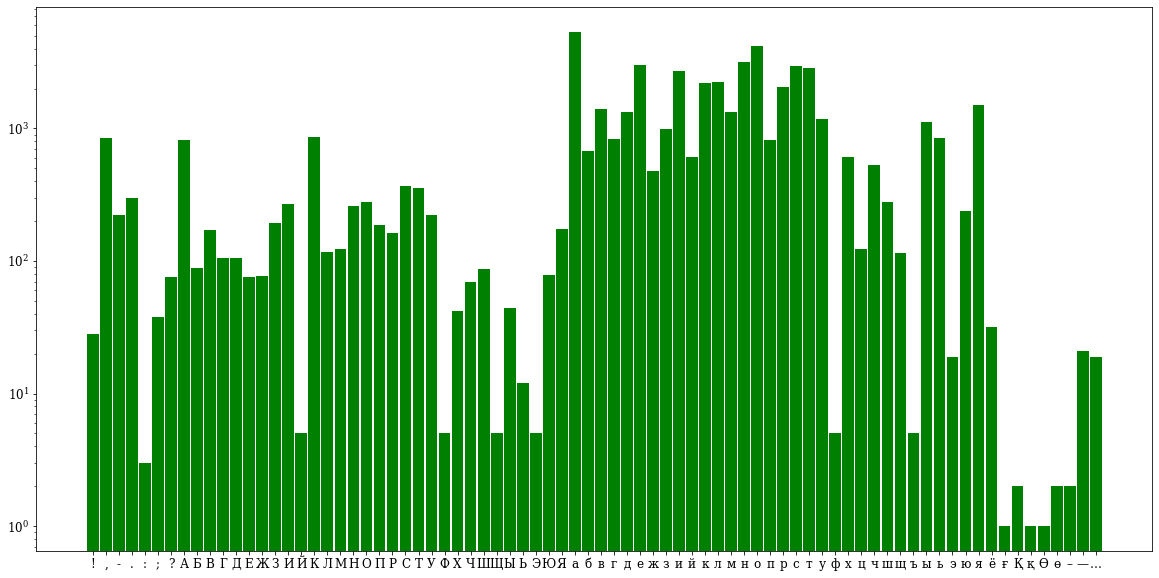

In [428]:
import matplotlib.pyplot as plt
#from matplotlib import rc

# Use LaTeX to generate cyrillic symbols in pic (comment this block to get fast generation)
#rc('font', **{'family': 'serif'})
rc('text', usetex=False)
#rc('text.latex', unicode=True)
#rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
#rc('text.latex', preamble=r"\usepackage[russian]{babel}")


width = 0.9
#plt.xlabel(u'текст')
plt.rcParams['font.size'] = 12
plt.figure(figsize=(20,10))
plt.bar(train_symbols.keys(), train_symbols.values(), width, color = 'g', log = True)
#plt.show()
plt.savefig('abc_log_train_symbols.png', size=6, transparent=False, bbox_inches='tight', pad_inches=0, dpi=300)

plt.rcParams['font.size'] = 12
plt.figure(figsize=(20,10))
plt.bar(val_symbols.keys(), val_symbols.values(), width, color = 'g', log = True)
#plt.show()
plt.savefig('abc_log_val_symbols.png', size=6, transparent=False, bbox_inches='tight', pad_inches=0, dpi=300)

plt.rcParams['font.size'] = 12
plt.figure(figsize=(20,10))
plt.bar(test1_symbols.keys(), test1_symbols.values(), width, color = 'g', log = True)
#plt.show()
plt.savefig('abc_log_test1_symbols.png', size=6, transparent=False, bbox_inches='tight', pad_inches=0, dpi=300)

plt.rcParams['font.size'] = 12
plt.figure(figsize=(20,10))
plt.bar(test2_symbols.keys(), test2_symbols.values(), width, color = 'g', log = True)
#plt.show()
plt.savefig('abc_log_test2_symbols.png', size=6, transparent=False, bbox_inches='tight', pad_inches=0, dpi=300)